## Avoided Crossing

We try to find the region of avoided crossing between the given potential curves. We first load the data as before.

In [1]:
# import libraries 

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
#import mpld3                          # can be installed by "pip install mpld3"
#mpld3.enable_notebook()

Note: Although the mpld3 library is very useful, it slows down the plotting procedure.

In [2]:
# function definitions 

def derive(f,a,h):
    
    return (f(a+h) - f(a-h))/(2*h)


def create_interp(x,V):
    
    f = interpolate.interp1d(x,V,kind="cubic",fill_value="extrapolate")
    
    return f

In [3]:
def Verlet (x_V,V,m,x0,v0,tmax,dt):
    """
    Inputs
    ------
    x_v   : Spatial dependence of the potential   (type:list)
    V     : Potential                             (type:list)
    m     : Mass of the particle                  (type:float)
    x0    : Initial position of the particle      (type:float)
    v0    : Initial velocity of the particle      (type:float)
    tmax  : Simulation time                       (type:float)
    dt    : Time step                             (type:float)
    
    This function returns the time evolution of the position, velocity, 
    and energy of a particle under an arbitrary position dependent potential.
    """
    
    t = 0
    x = x0
    v = v0
    V_int = create_interp(x_V,V)
    a = -derive(V_int,x,dt)/m
    pos = []
    vel = []
    energy = []
    time = []
    pot = []
    
    while(t<tmax):                     
                
            x_prev = x
            x = x_prev + v*dt + 0.5*(dt)**2 * a
            a_prev = a
            a = -derive(V_int,x,dt)/m
            v_prev = v
            T = 0.5*v*v
            E_pot = V_int(x)
            E = T + E_pot
            v = v_prev + 0.5*(dt)*(a + a_prev)
            t = t + dt
            
            pos.append(x)
            vel.append(v)
            energy.append(E)
            pot.append(E_pot)
            time.append(t)
            
            
        
        
    return(time,pos,vel,pot,energy)             # return the solution

In [4]:
# the first column contains the position

x_data = np.loadtxt("myData.txt", delimiter=' ',skiprows=2)[:,0]       

# other columns contain energy values

E_data = [np.loadtxt("myData.txt", delimiter=' ',skiprows=2)[:,i] for i in range(1,8)]

And plot the potential curves with respect to the position

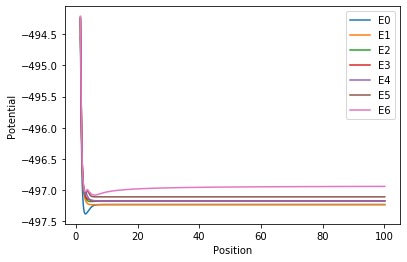

In [5]:
for i in range(len(E_data)): 
    
    plt.plot(x_data,E_data[i],label="E" + str(i))

plt.legend(loc='best')
plt.xlabel("Position")
plt.ylabel("Potential")
plt.show()

Now we select one of the potential curves ($E_j$) and compute the difference in the potential of the chosen curve between the rest (i.e. $E_i$ where $i\neq j$). We also compute the derivative of these differences with respect to position $\frac{d(E_j-E_i)}{dx}$. Then create a figure composed of six 1 by 2 subplots. On the second column, we plot the derivative of the difference and on the first column, we have the potential curves.

Curve number (zero for the ground state): 6


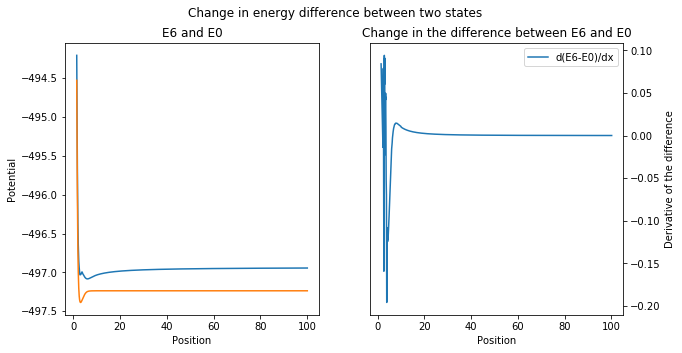

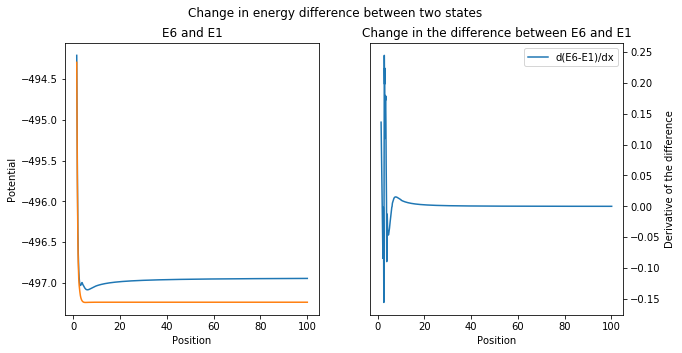

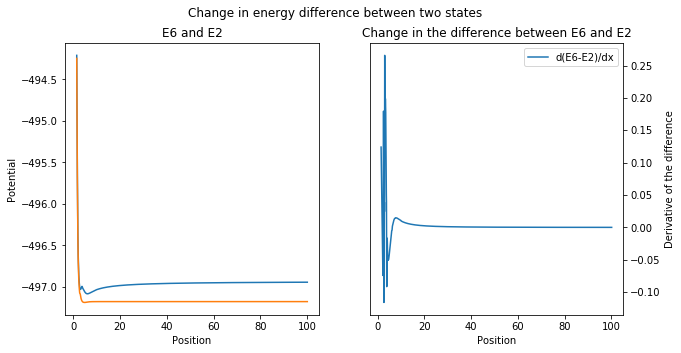

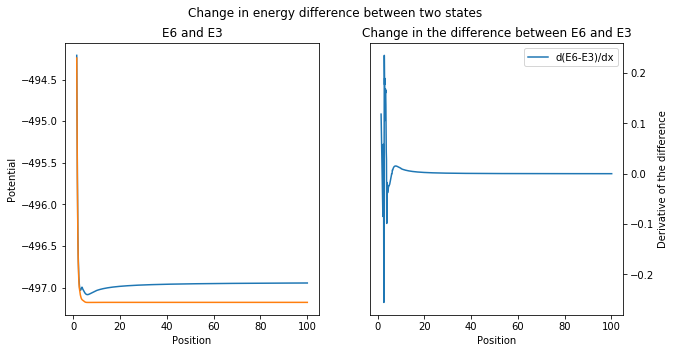

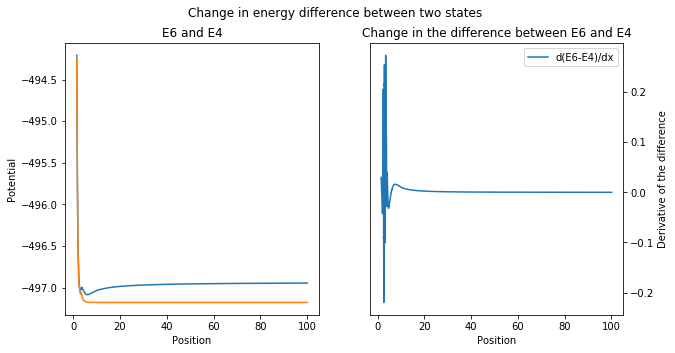

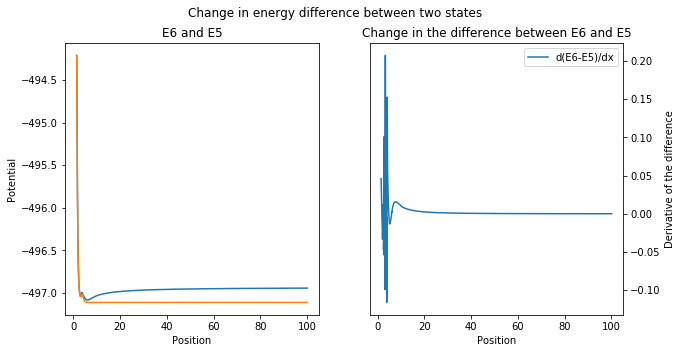

In [6]:
j = int(input("Curve number (zero for the ground state): "))

E_diff = [E_data[j]-E_data[i] for i in range(7)]
dE_diff = np.diff(E_diff)/np.diff(x_data)



for i in range(7):
    
    if i==j:
        
        continue

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle("Change in energy difference between two states")
    
    ax1.plot(x_data,E_data[j],label="E%d$" % j)
    ax1.plot(x_data,E_data[i],label="$E%d" % i)
    ax1.set(xlabel='Position', ylabel='Potential')
    ax1.set_title("E%d and E%d" % (j,i))
    
    ax2.plot(x_data[1:],dE_diff[i],label="d(E%d-E%d)/dx" % (j,i))
    ax2.set_title("Change in the difference between E%d and E%d" % (j,i))
    ax2.set(xlabel='Position',ylabel="Derivative of the difference")
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    #a21.label_outer()
    
    plt.legend(loc="best")
    plt.show()

Now we look for the sign change in $\frac{d(E_j-E_i)}{dx}$ to obtain the zeros of the derivative.

In [7]:
sign_change = [np.where(np.diff(np.sign(dE_diff[i])))[0] + 1 for i in range(7)]

print("Indices corresponding to the sign change of the derivative of the difference between\n")

for i in range(7):
    
    if i == j:
        
        continue
            
    print("E" + str(j) + " and E" + str(i) + ": " + str(sign_change[i]))

Indices corresponding to the sign change of the derivative of the difference between

E6 and E0: [ 84  98 127 152 188 201 245 584]
E6 and E1: [ 56 149 273 553]
E6 and E2: [ 57 111 132 161 273 561]
E6 and E3: [ 56 105 120 151 272 544]
E6 and E4: [ 34  95 119 151 187 214 278 292 332 516]
E6 and E5: [ 44 106 115 148 185 200 227 296 383 524]


Here we plot the different energy curves on the interval [a,b] where a and b are the first and the last occurence of the sign change respectively. Note that we can use the buttons appearing on the lower left corner of the plots to zoom in.

In [8]:
# position values at which the sign change occurs.

x_sign_change = []
for i in range(7):
    
    if i == j:
        
        continue
        
    x_sign_change.append(x_data[sign_change[i]])


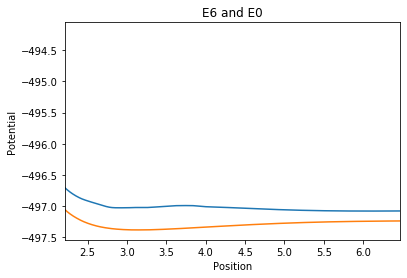

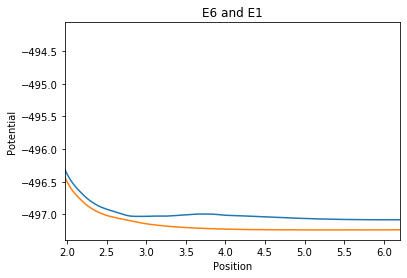

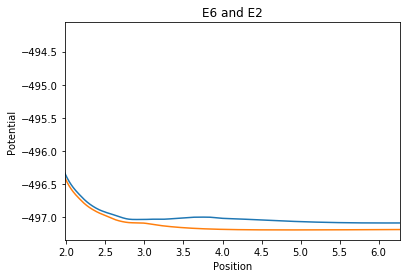

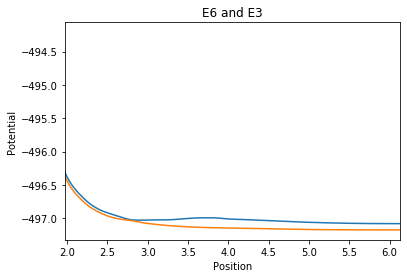

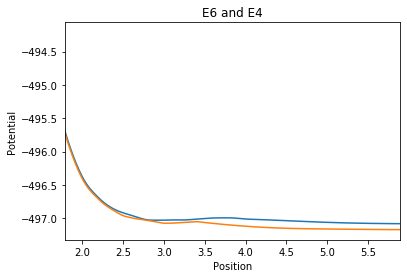

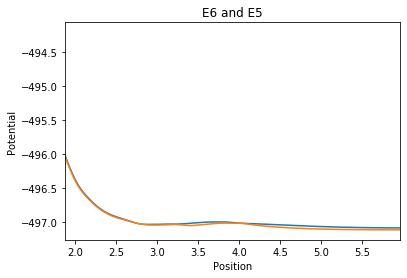

In [9]:
for i in range(7):
    
    if i==j:
        
        continue
    
    plt.plot(x_data,E_data[j],label="E%d" % j)
    plt.plot(x_data,E_data[i],label="E%d" % i)
    plt.xlim(x_sign_change[i][0],x_sign_change[i][-1])
    plt.xlabel('Position')
    plt.ylabel('Potential')
    plt.title("E%d and E%d" % (j,i))
    plt.show()

In [10]:
# Verlet inputs: (x_V,V,m,x0,v0,tmax,dt)

m_ccl = (35.453 * 12.0107)/(35.453 + 12.0107)
E = float(input("Initial kinetic energy: "))
v_ccl = (2*E/m_ccl)**0.5
x0 = -90
curve1 = Verlet(x_data,E_data[j],m_ccl,x0,v_ccl,180/v_ccl,0.01)

Initial kinetic energy: 1e3


Now, try to find the avoided crossings on the fly. In the following, x_chosen corresponds to the solution of the equation of motion and V_chosen corresponds to the interpolated potential curve on the interval x_chosen.

Choose a curve to compare to the curve 6 (0 for ground state): 5


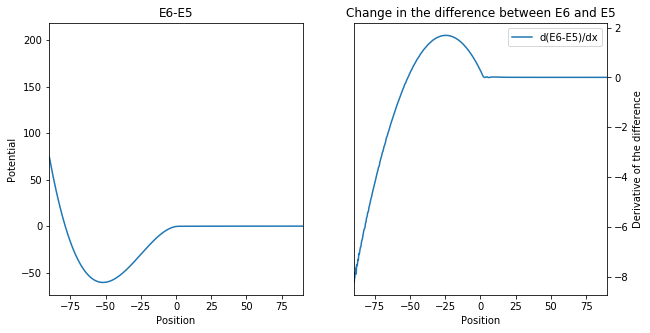

In [11]:
k = int(input("Choose a curve to compare to the curve %d (0 for ground state): " %j))

# j is the initially chosen curve and k is the curve to compare

x_chosen = curve1[1]
V_chosen = curve1[3]

# compare to one of the other states 

V_compared = create_interp(x_data,E_data[k])(x_chosen)  # interpolate the chosen curve on the interval x_chosen

V_diff = V_chosen-V_compared
dV_diff = np.diff(V_diff)/np.diff(x_chosen)

# find the sign changes in the derivative

V_sign_change = np.where(np.diff(np.sign(dV_diff)))[0] + 1


# plot 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(x_chosen,V_diff,label="E%d-E%d" % (j,k))
ax1.set(xlabel='Position', ylabel='Potential')
ax1.set_title("E%d-E%d" % (j,k))
ax1.set_xlim(-90,90)
    
ax2.plot(x_chosen[1:],dV_diff,label="d(E%d-E%d)/dx" % (j,k))
ax2.set_title("Change in the difference between E%d and E%d" % (j,k))
ax2.set(xlabel='Position',ylabel="Derivative of the difference")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlim(-90,90)
    
plt.legend(loc="best")
plt.show()




In [12]:
print("Position values at which the derivative of the energy difference is zero:\n")
for i in range(len(V_sign_change)):
    print(x_chosen[V_sign_change[i]])

Position values at which the derivative of the energy difference is zero:

-51.54270259089024
2.04203940556099
2.92068072299527
4.67796339298813
6.435247466064916


Check that the energy difference is constant in the interval $(x-\epsilon,x+\epsilon)$

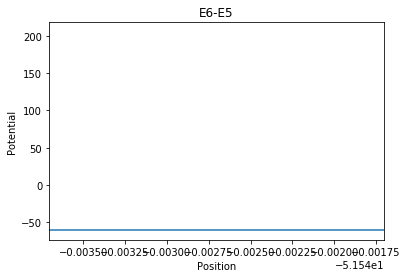

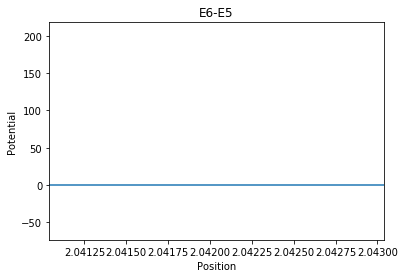

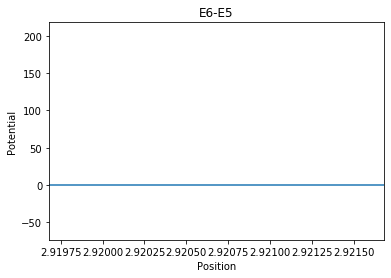

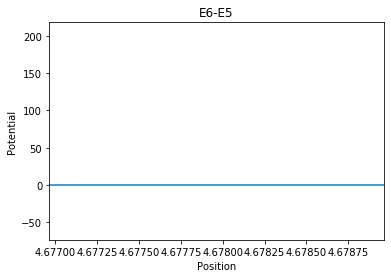

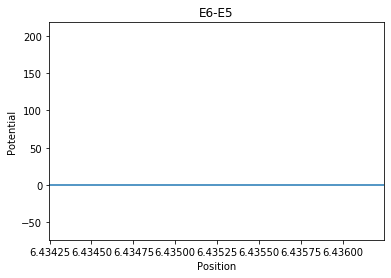

In [13]:
# zoom in the curve in the neighbourhood of the position value at which the energy difference is constant
eps = 1e-3

for i in range(len(V_sign_change)):


    plt.plot(x_chosen,V_chosen-V_compared)
    plt.xlabel('Position')
    plt.ylabel('Potential')
    plt.xlim(x_chosen[V_sign_change[i]]-eps,x_chosen[V_sign_change[i]]+eps)
    plt.title("E%d-E%d" % (j,k))
    plt.show()